<a href="https://colab.research.google.com/github/Namesakenberg/Hyperparameter-Hangout/blob/main/Box_Cox_and_Yeo_Johnson_transformers_on_concrete_strength_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/concrete_data.csv')


In [ ]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
# some columns of the dataset have entries equal to zero , but no column has negative values

In [ ]:
df.shape

(1030, 9)

In [ ]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
df.isnull().sum()

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
concrete_compressive_strength,0


In [ ]:
# no column in the data set has null values

In [ ]:
# in this dataset we are predicting the strength of the concrete based on different components in it .
# hence we use the linear regression to predict the strength

In [ ]:
# make X ,y variables
X = df.drop(columns=['concrete_compressive_strength'])
y = df[df.columns[-1]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# apply the linear regression without transformation

from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(X_train,y_train)
y_pred=LinReg.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
# r2 score tells us how good our model performs as compare to simple mean model



0.627553179231485

In [ ]:
# cross checking with the crossvalidation score
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(LinReg,X,y,scoring='r2'))

0.46099404916628606

The prediction made by our model is really poor than shown in the r2 score

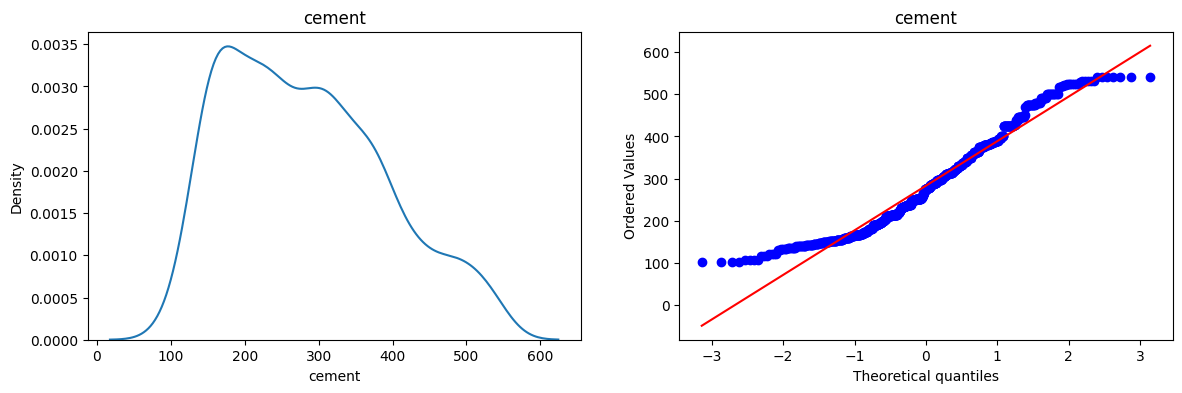

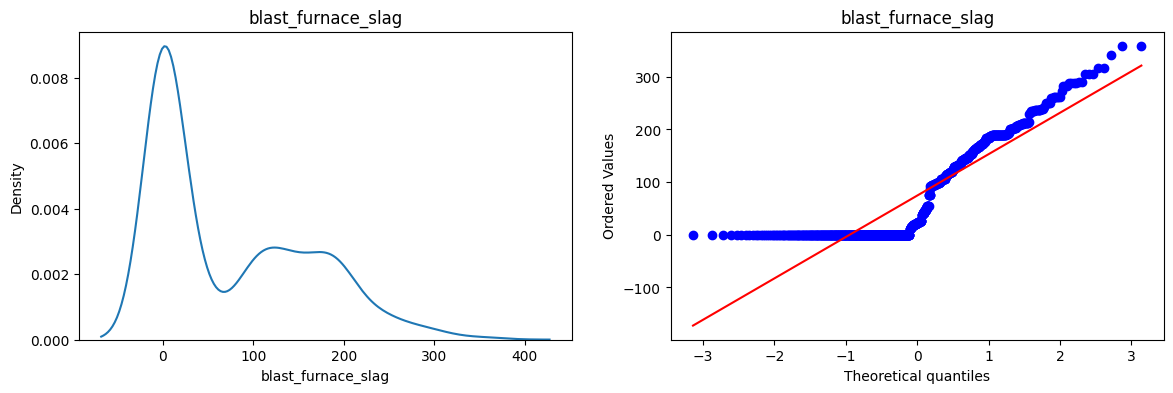

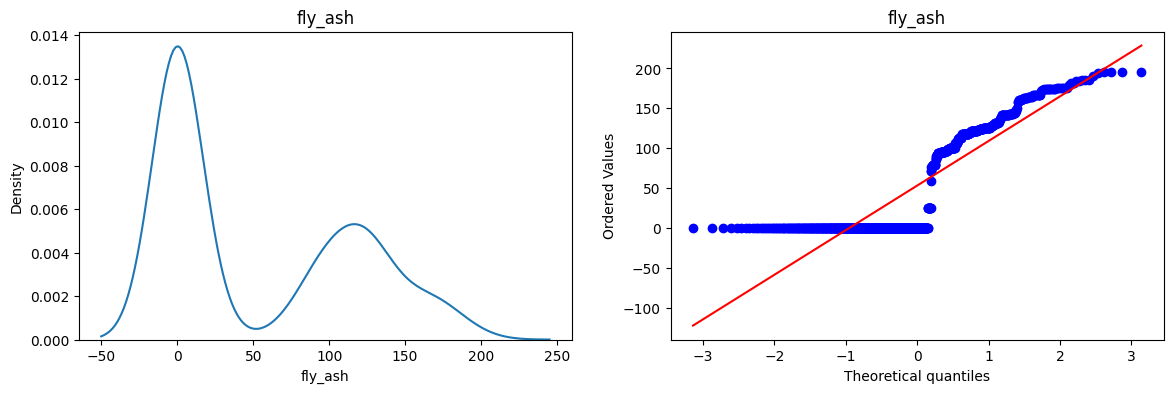

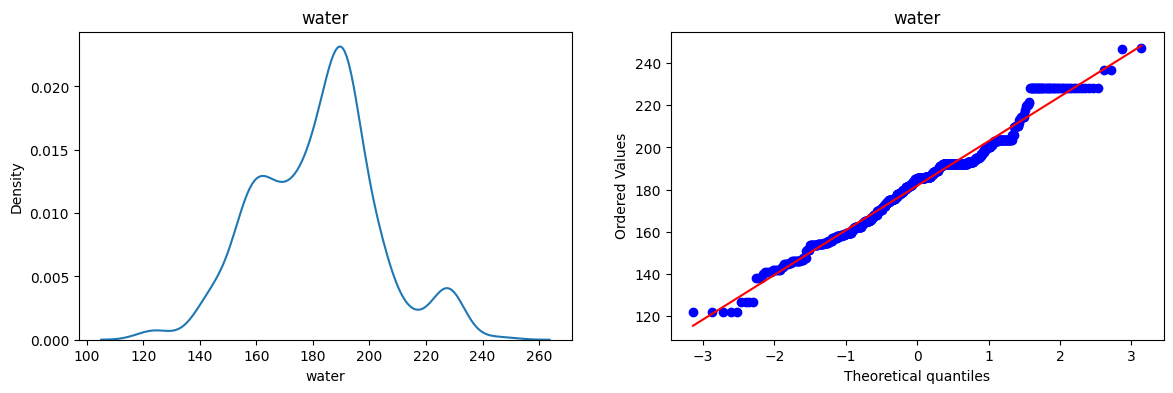

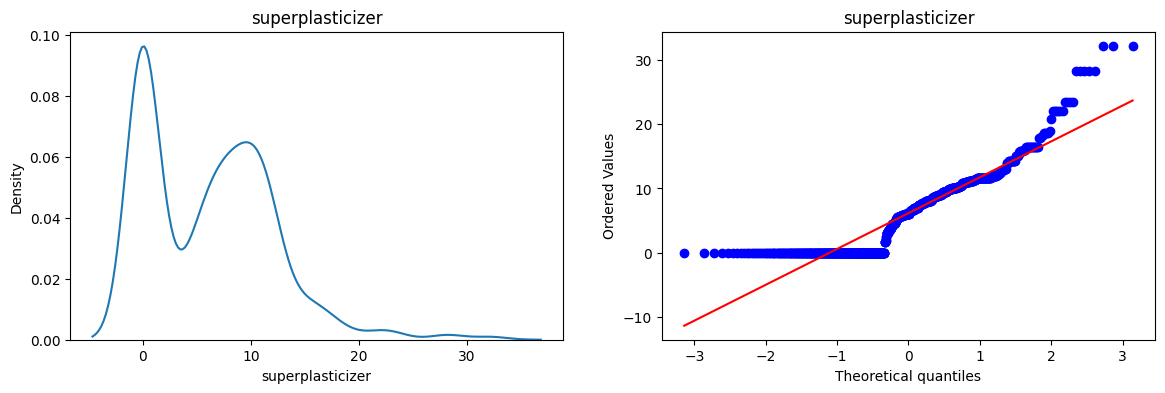

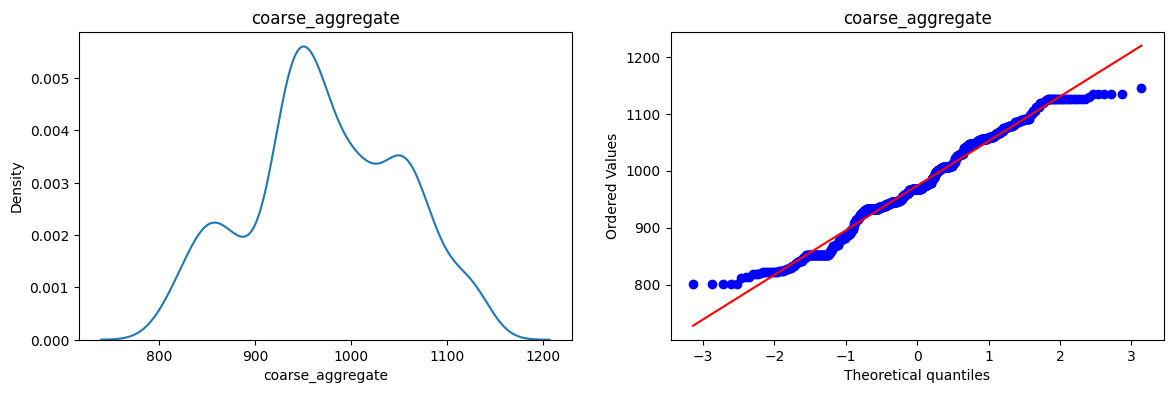

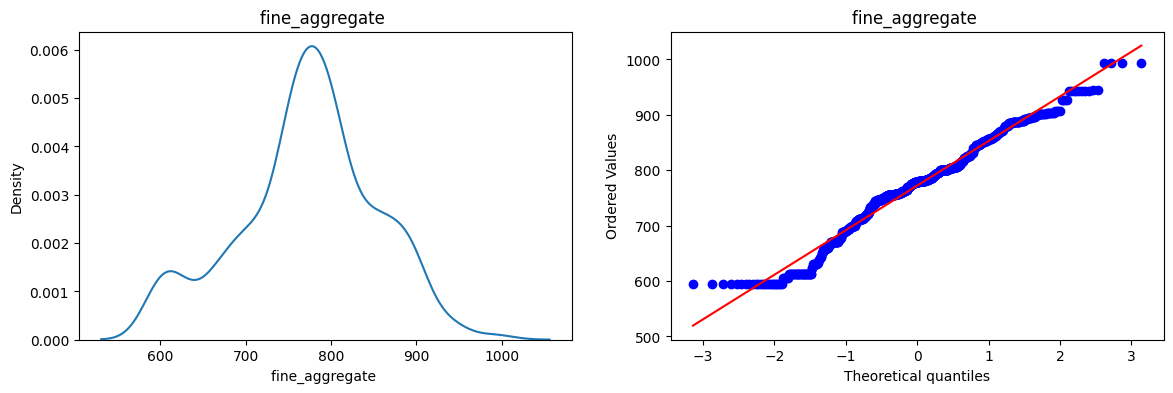

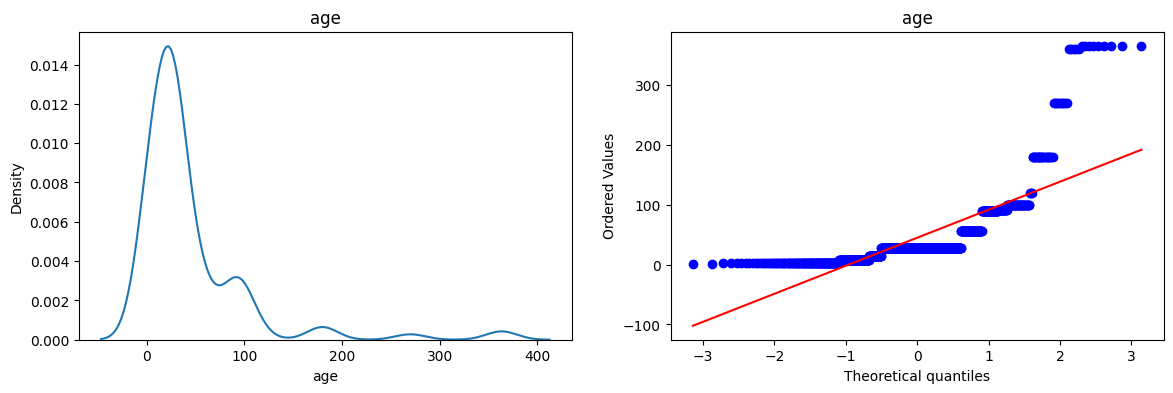

In [ ]:
# distribution of all the columns before transformation using kde plot and the QQ plot
for col in X_train.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.kdeplot(X_train[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(X_train[col],dist="norm",plot=plt)
  plt.title(col)
  plt.show()

In [ ]:
# age column is the worst as it has the worst QQ plot and we can also see that the data is right skewed

In [ ]:
# now the age column has the values strictly greater than 0 hence we can apply the box - cox transformation on it to convert it into normal distributuion

In [26]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train+0.000001) # add 0.00001 to avoid any value being 0
X_test_transformed = pt.transform(X_test+0.00001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,cement,0.177025
1,blast_furnace_slag,0.025093
2,fly_ash,-0.038970
3,water,0.772682
4,superplasticizer,0.098811
5,coarse_aggregate,1.129813
6,fine_aggregate,1.782018
7,age,0.066631


In [32]:
LinReg=LinearRegression()
LinReg.fit(X_train_transformed,y_train)
y_pred2 =LinReg.predict(X_test_transformed)
# r2 score tells us how good our model performs as compare to simple mean model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.8079756386677882

In [35]:
# cross check with the cross val score
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.000001) # add 0.00001 to avoid any value being 0
np.mean((cross_val_score(LinReg,X_transformed,y,scoring='r2')))


0.6662950324463968

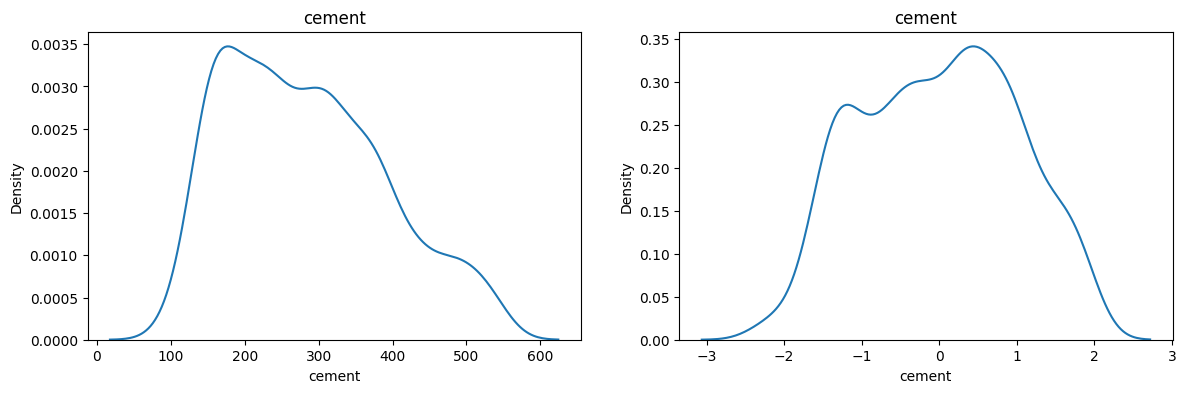

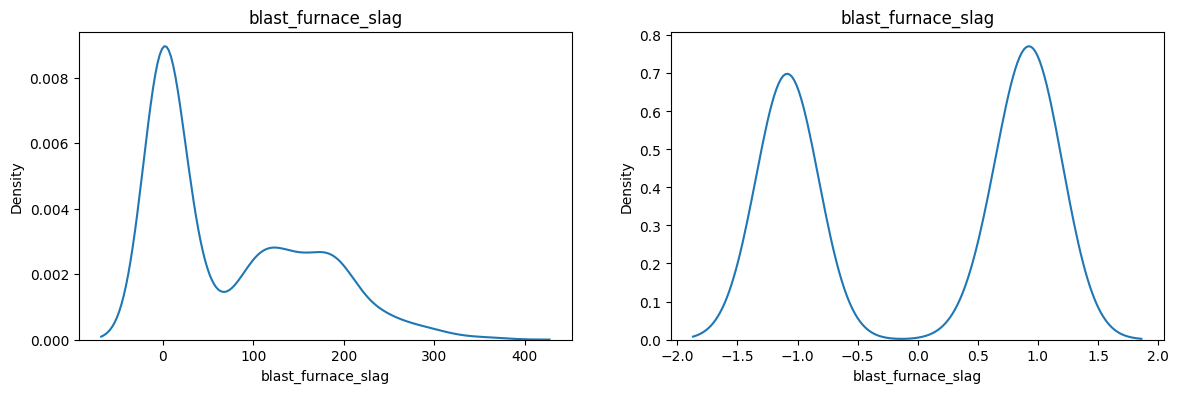

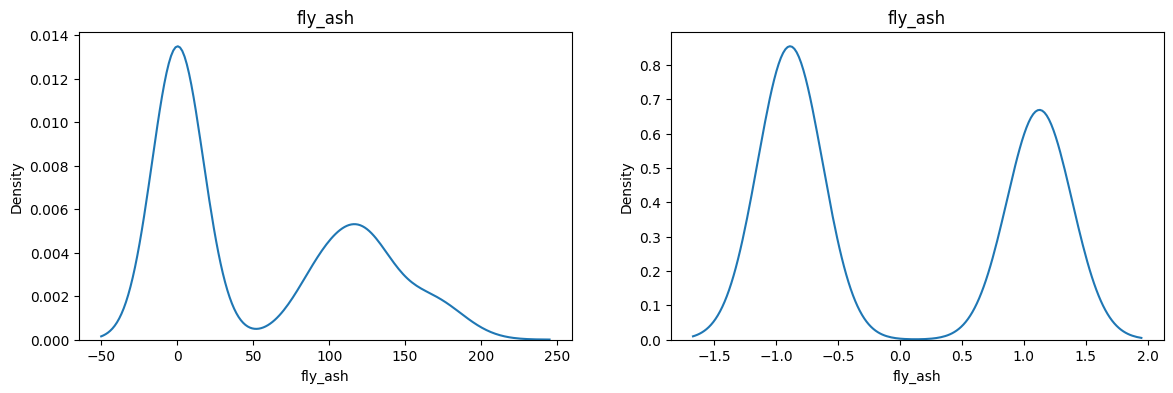

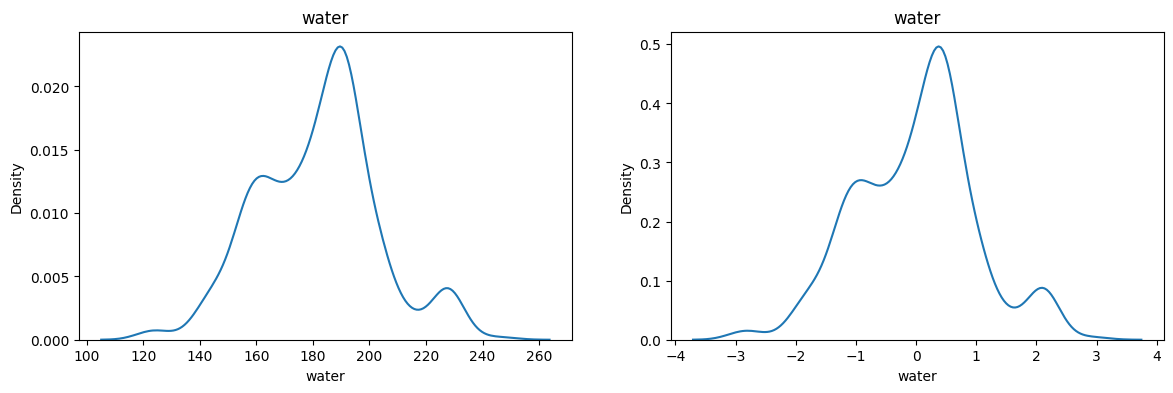

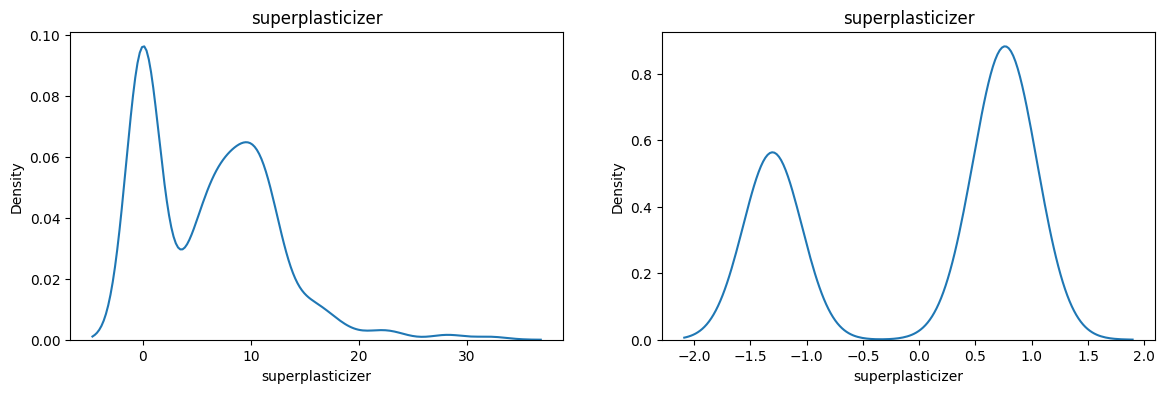

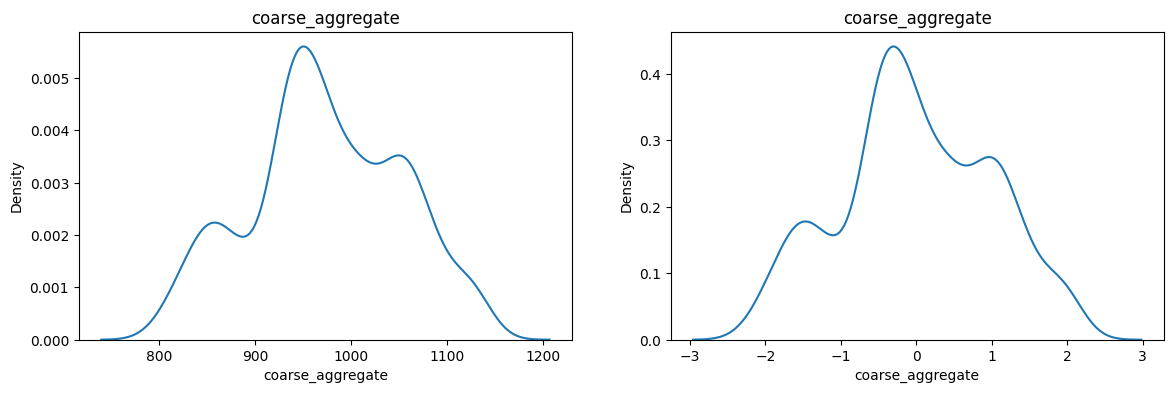

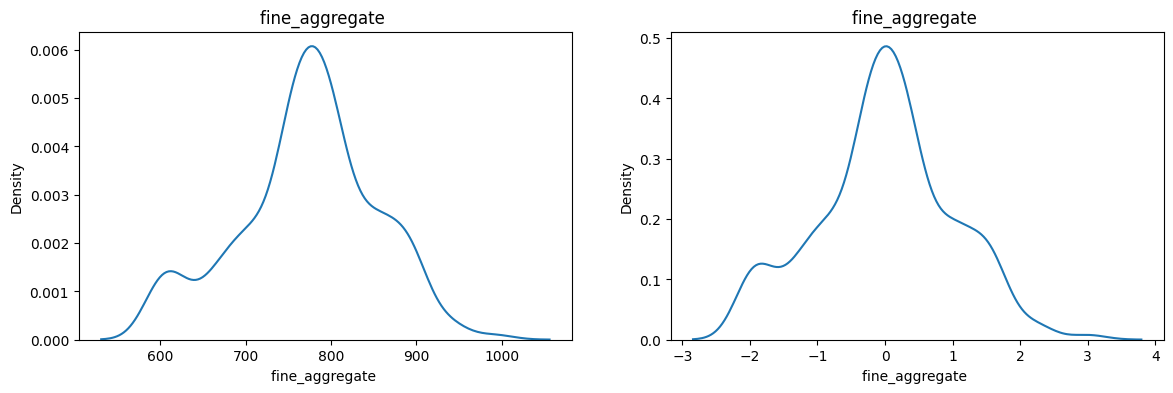

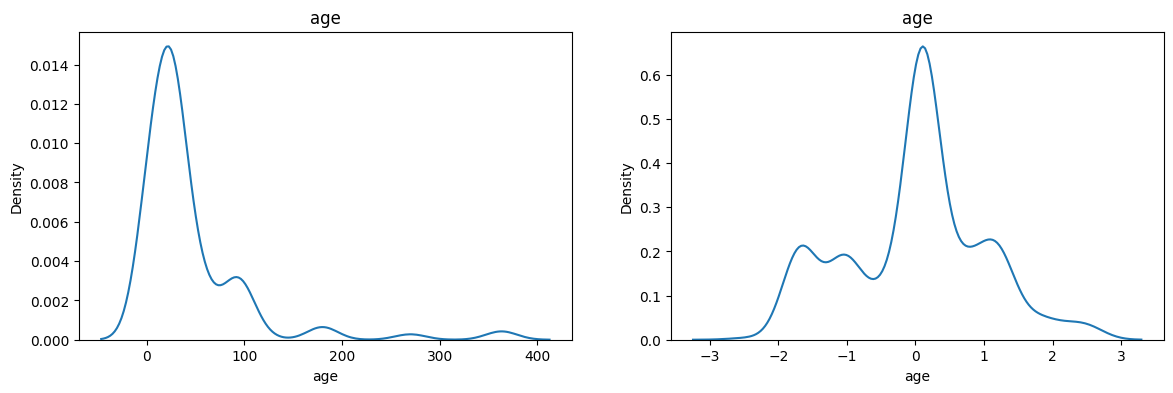

In [41]:
# comaprison of graph before and after the box cox transformation
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)
for col in X_train_transformed.columns:
  plt.figure(figsize=(14,4))
  plt.subplot(121)
  sns.kdeplot(X_train[col])
  plt.title(col)
  plt.subplot(122)
  sns.kdeplot(X_train_transformed[col])
  plt.title(col)
  plt.show()


# The age column is converted into a curve very close to normal distribution

In [ ]:
# calculating the r2 score using the yeo johnson method

In [43]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train_transformed = pt.fit_transform(X_train+0.000001) # add 0.00001 to avoid any value being 0
X_test_transformed = pt.transform(X_test+0.00001)
pd.DataFrame({'cols':X_train.columns,'yeo_johnson_lambdas':pt.lambdas_})


,cols,yeo_johnson_lambdas
0,cement,0.174348
1,blast_furnace_slag,0.015715
2,fly_ash,-0.161447
3,water,0.771307
4,superplasticizer,0.253935
5,coarse_aggregate,1.130050
6,fine_aggregate,1.783100
7,age,0.019885


In [44]:
LinReg=LinearRegression()
LinReg.fit(X_train_transformed,y_train)
y_pred2 =LinReg.predict(X_test_transformed)
# r2 score tells us how good our model performs as compare to simple mean model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.8161906598843569